<a href="https://colab.research.google.com/github/TurMod/Data-Science-HW/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.metrics import Precision, Recall, F1Score

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall(), F1Score()]
)

In [18]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 1600)             

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

history = model.fit(
    x_train,
    y_train,
    epochs=18,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/18
469/469 [==============================] - 49s 101ms/step - loss: 0.6566 - accuracy: 0.7606 - precision_2: 0.8530 - recall_2: 0.6746 - f1_score: 0.7564 - val_loss: 0.4228 - val_accuracy: 0.8465 - val_precision_2: 0.8863 - val_recall_2: 0.8001 - val_f1_score: 0.8420
Epoch 2/18
469/469 [==============================] - 47s 100ms/step - loss: 0.4348 - accuracy: 0.8431 - precision_2: 0.8833 - recall_2: 0.8000 - f1_score: 0.8415 - val_loss: 0.3601 - val_accuracy: 0.8664 - val_precision_2: 0.8965 - val_recall_2: 0.8389 - val_f1_score: 0.8621
Epoch 3/18
469/469 [==============================] - 46s 99ms/step - loss: 0.3816 - accuracy: 0.8617 - precision_2: 0.8944 - recall_2: 0.8291 - f1_score: 0.8605 - val_loss: 0.3365 - val_accuracy: 0.8781 - val_precision_2: 0.9047 - val_recall_2: 0.8536 - val_f1_score: 0.8765
Epoch 4/18
469/469 [==============================] - 48s 101ms/step - loss: 0.3495 - accuracy: 0.8723 - precision_2: 0.9012 - recall_2: 0.8433 - f1_score: 0.8713 - val_l

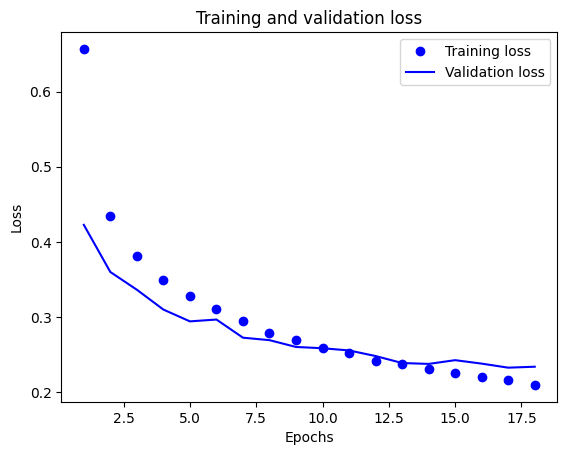

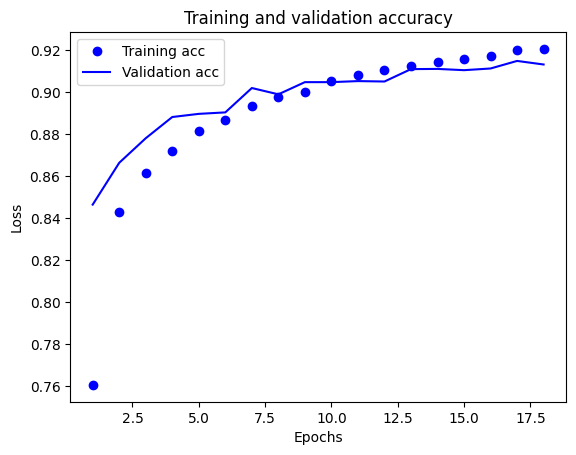

In [20]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 4s 11ms/step - loss: 0.2342 - accuracy: 0.9132 - precision_2: 0.9248 - recall_2: 0.9041 - f1_score: 0.9120
[0.23416894674301147, 0.9132000207901001, 0.9248158931732178, 0.9041000008583069, array([0.86627907, 0.9879397 , 0.86746985, 0.9176706 , 0.86051077,
       0.9834087 , 0.7269737 , 0.9638435 , 0.9786388 , 0.966967  ],
      dtype=float32)]
